In [5]:
from ObjectiveFunction import ObjectiveFunction
from EvolutionaryStrategy import EvolutionaryStrategy
import numpy as np
import json
import matplotlib.pyplot as plt

# 10 different Run

### n = 3

### n = 6

# self adaptive mutation is disabled

In [7]:
with open("config.json", 'r') as f:
    config = json.load(f)
es = EvolutionaryStrategy(config)
es.mutation_enable
es.run()

{'evolutionary_strategy': {'survival_method': 'elitism', 'max_generations': 1000, 'population_size': 30, 'num_offspring': 200, 'initial_sigma': 0.75, 'mutation_enable': 'False', 'objective_function_config': {'objective_function': 'schwefel_function', 'range': [-500, 500], 'chromosome_length': 5}}}


(458.8828759290243,
 [203.09101444936607,
  404.7880136794179,
  409.7564977231473,
  443.41817149546443,
  -312.5017395660895])

# Convergence speed

# Elitism or Generational

# results with different num_offsprings

In [6]:
num_offspring_values = [15, 20, 40, 80, 100, 200,300, 400]
results = []
for num_offspring in num_offspring_values:
    json_string = f'''
    {{
      "evolutionary_strategy": {{
        "survival_method": "elitism",
        "max_generations": 1000,
        "population_size": 30,
        "num_offspring": {num_offspring},
        "initial_sigma": 0.75,
        "objective_function_config": {{
          "objective_function": "schwefel_function",
          "range": [-500, 500],
          "chromosome_length": 5
        }}
      }}
    }}
    '''
    config = json.loads(json_string)
    es = EvolutionaryStrategy(config)
    result = es.run()
    results.append(result)


In [7]:
min_fitnesses = [result[0] for result in results]

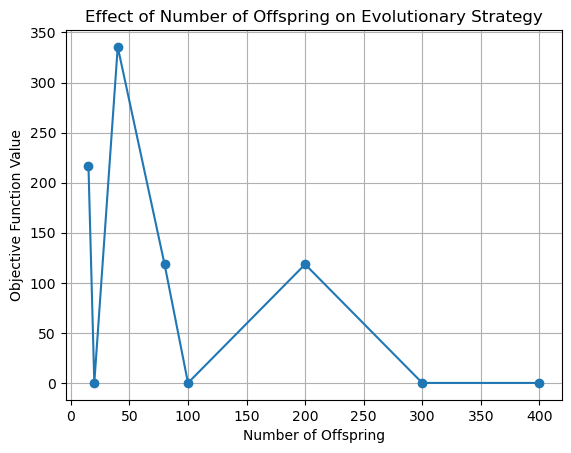

In [8]:
plt.plot(num_offspring_values, min_fitnesses, marker='o')
plt.xlabel('Number of Offspring')
plt.ylabel('Objective Function Value')
plt.title('Effect of Number of Offspring on Evolutionary Strategy')
plt.grid(True)
plt.show()

# results with different initial_sigma

In [ ]:
initial_sigma_values = [0.001, 0.025, 0.05, 0.25, 0.5,0.75, 0.85]
results = []
for initial_sigma in initial_sigma_values:
    json_string = f'''
    {{
      "evolutionary_strategy": {{
        "survival_method": "elitism",
        "max_generations": 1000,
        "population_size": 30,
        "num_offspring": 200,
        "initial_sigma": {initial_sigma},
        "objective_function_config": {{
          "objective_function": "schwefel_function",
          "range": [-500, 500],
          "chromosome_length": 5
        }}
      }}
    }}
    '''
    config = json.loads(json_string)
    es = EvolutionaryStrategy(config)
    result = es.run()
    results.append(result)

In [ ]:
min_fitnesses = [result[0] for result in results]

In [ ]:
plt.plot(initial_sigma_values, min_fitnesses, marker='o')
plt.xlabel('Number of Initial Sigma')
plt.ylabel('Objective Function Value')
plt.title('Effect of Number of Initial Sigma on Evolutionary Strategy')
plt.grid(True)
plt.show()

# results with different max_generations

In [ ]:
max_generations_values = [100, 200, 400, 600, 800, 1000, 1500]
results = []
for max_generations in max_generations_values:
    json_string = f'''
    {{
      "evolutionary_strategy": {{
        "survival_method": "elitism",
        "max_generations": {max_generations},
        "population_size": 30,
        "num_offspring": 200,
        "initial_sigma": 0.75,
        "objective_function_config": {{
          "objective_function": "schwefel_function",
          "range": [-500, 500],
          "chromosome_length": 5
        }}
      }}
    }}
    '''
    config = json.loads(json_string)
    es = EvolutionaryStrategy(config)
    result = es.run()
    results.append(result)

In [ ]:
min_fitnesses = [result[0] for result in results]

In [ ]:
plt.plot(max_generations_values, min_fitnesses, marker='o')
plt.xlabel('Number of Generations')
plt.ylabel('Objective Function Value')
plt.title('Effect of Number of Generations on Evolutionary Strategy')
plt.grid(True)
plt.show()